In [1]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
#import seaborn as sns
import openpyxl
from tensorflow.keras.layers import *
#from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
#import matplotlib

### Read Data 

In [2]:
data=pd.read_excel('hourly_data.xlsx',header=0)

In [3]:
data['Mean Conductivity per Hour']=data['Mean Conductivity per Hour'].round(decimals = 0)

In [4]:
df2_date=data['Date']

## Split to Training and Testing 

## We will use the first 6000 rows from the other four features , to predict the EC value for the next day. So for the EC value we skip the first 24 rows( as we have hourly data) and we use the data until  row  6024, in order to gather 6000 samples in total for EC.

In [5]:
df2_train=data.iloc[0:6000,1:] #training
df2_train_dates=df2_date.iloc[24:6000+24] #Training Dates of EC

In [6]:
df2_train_dates

24     2021-04-07 11:00:00
25     2021-04-07 12:00:00
26     2021-04-07 13:00:00
27     2021-04-07 14:00:00
28     2021-04-07 15:00:00
               ...        
6019   2021-12-13 18:00:00
6020   2021-12-13 19:00:00
6021   2021-12-13 20:00:00
6022   2021-12-13 21:00:00
6023   2021-12-13 22:00:00
Name: Date, Length: 6000, dtype: datetime64[ns]

## Scale 

In [7]:
sc=StandardScaler()
df2_train_scaled=sc.fit_transform(df2_train[['Atm.Temperature','Mean Watertemperature per Hour','Mean Salinity per Hour','Mean Chlorofyl per Hour']])

In [8]:
sc2=StandardScaler()
df2_train_scaled_y=sc2.fit_transform(data[['Mean Conductivity per Hour']].iloc[24:6024])#Training Target

## Resphape into steps 

In [9]:
hops=14

#no_cols=4
X_train=[]
y_train=[]
for i in range(14,df2_train.shape[0]):
    X_train.append(df2_train_scaled[i-14:i])
    y_train.append(df2_train_scaled_y[i][0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [10]:
X_train_shape=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))


## Build Model 

In [11]:
model5=Sequential()
model5.add(LSTM(units=50,return_sequences=True,input_shape=(14,4)))
model5.add(LSTM(units=50))
model5.add(Dropout(0.2))
model5.add(Dense(1))
model5.compile(optimizer='adam',loss='mean_squared_error')

## Train the Model 

In [12]:
model5.fit(X_train_shape,y_train,epochs=250,batch_size=16)

Epoch 1/250
375/375 [==============================] - 2s 5ms/step - loss: 0.1406
Epoch 2/250
375/375 [==============================] - 2s 5ms/step - loss: 0.1029
Epoch 3/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0916
Epoch 4/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0878
Epoch 5/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0799
Epoch 6/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0716
Epoch 7/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0724
Epoch 8/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0718
Epoch 9/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0653
Epoch 10/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0630
Epoch 11/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0616
Epoch 12/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0591
Epoch 13/250


375/375 [==============================] - 2s 5ms/step - loss: 0.0162
Epoch 100/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0172
Epoch 101/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0156
Epoch 102/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0171
Epoch 103/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0160
Epoch 104/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0148
Epoch 105/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0156
Epoch 106/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0165
Epoch 107/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0179
Epoch 108/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0187
Epoch 109/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0154
Epoch 110/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0143
Epoch 

375/375 [==============================] - 2s 5ms/step - loss: 0.0121
Epoch 197/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0132
Epoch 198/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0119
Epoch 199/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0117
Epoch 200/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0110
Epoch 201/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0113
Epoch 202/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0132
Epoch 203/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0120
Epoch 204/250
375/375 [==============================] - 2s 6ms/step - loss: 0.0121
Epoch 205/250
375/375 [==============================] - 2s 6ms/step - loss: 0.0119
Epoch 206/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0117
Epoch 207/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0112
Epoch 

## Create the test Dataset. For the testing dataset we will start from the index 6000, as the training dataset ended, and to get the appropriate numberfor use , we substract the 6024 records used for the EC Target from the total number of records ,which is  8665.In this way, we are left with  24 records in order to use for Forecasting.

In [13]:
df2_test=data.iloc[6000:6000+(len(data)-6024),1:]#training
df2_test_dates=df2_date.iloc[6000:6000+(len(data)-6024)] #training dates
df2_test.reset_index(inplace=True)

In [14]:
df_train_last14=df2_train.iloc[-14:]
df_test_full=df2_test.drop(columns={'index'})
full_df=pd.concat((df_train_last14,df_test_full),axis=0)


## Scale 

In [15]:
full_df=full_df.drop(columns={'Mean Conductivity per Hour'})
full_df=sc.transform(full_df)

## Reshape 

In [16]:
hops=14
X_train_shape_pred=[]

for i in range(14,full_df.shape[0]):
    X_train_shape_pred.append(full_df[i-14:i])
X_train_shape_pred=np.array(X_train_shape_pred)

## Predict 

In [17]:
ytest=model5.predict(X_train_shape_pred)

## Inverse scaling 

In [18]:
y_final_pred=sc2.inverse_transform(ytest)


## Preprocess 

In [19]:
final_ec_pred=pd.DataFrame(y_final_pred)
final_ec_pred.columns=['final_ec_pred']
final_ec_pred.head()

,final_ec_pred
0,433.276611
1,434.060577
2,433.468018
3,433.976044
4,433.100159


In [20]:
fully_final=pd.concat((final_ec_pred,df2_test),axis=1)
fully_final=fully_final.drop(columns={'Mean Conductivity per Hour'})
a=pd.DataFrame(data=data['Mean Conductivity per Hour'].iloc[6024:8665])
a=a.reset_index(drop=True)
fully_final=pd.concat((fully_final,a),axis=1)
fully_final=fully_final.drop(columns={'index'})
df2_test_dates=df2_test_dates.reset_index(drop=True)
final=pd.concat(([fully_final,df2_test_dates]),axis=1)
Real_EC_Dates=df2_date.loc[6024:8665]
Real_EC_Dates=pd.DataFrame(data=Real_EC_Dates)
Real_EC_Dates=Real_EC_Dates.reset_index(drop=True)
Real_EC_Dates=Real_EC_Dates.rename(columns={'Date':'Real_EC_Dates'})
final=pd.concat(([final,Real_EC_Dates]),axis=1)

In [21]:
final.head()

,final_ec_pred,Atm.Temperature,Mean Watertemperature per Hour,Mean Salinity per Hour,Mean Chlorofyl per Hour,Mean Conductivity per Hour,Date,Real_EC_Dates
0,433.276611,10.1,9.5,0.36,7.450000,432.0,2021-12-12 23:00:00,2021-12-13 23:00:00
1,434.060577,10.2,9.5,0.36,7.725000,430.0,2021-12-13 00:00:00,2021-12-14 00:00:00
2,433.468018,10.1,9.5,0.36,7.575000,428.0,2021-12-13 01:00:00,2021-12-14 01:00:00
3,433.976044,9.9,9.5,0.36,8.108333,432.0,2021-12-13 02:00:00,2021-12-14 02:00:00
4,433.100159,8.0,9.5,0.36,8.116667,432.0,2021-12-13 03:00:00,2021-12-14 03:00:00


## Display Testing phase 

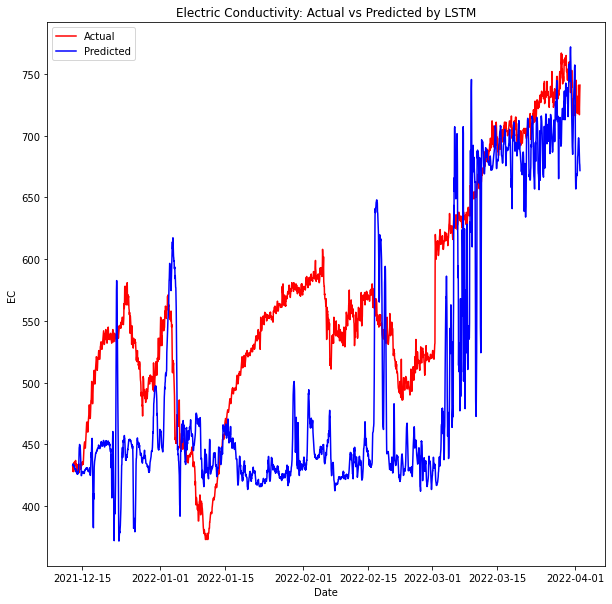

In [22]:
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.plot(final['Date'],final['Mean Conductivity per Hour'],label='Actual',color='red')
plt.plot(final['Date'],final['final_ec_pred'],label='Predicted',color='blue')


plt.title("Electric Conductivity: Actual vs Predicted by LSTM")
plt.xlabel("Date")
plt.ylabel("EC")


plt.legend()
plt.show()

## Evaluate using R2 

In [23]:
print("Test R2: ", r2_score(final['Mean Conductivity per Hour'],final['final_ec_pred'].round(decimals = 0)))

Test R2:  0.09371529487122099


## For the Forecasting phase, we have the last 24 rows, from the othe four features,at our disposal 

In [24]:
len(data)-(len(df2_train)+len(df2_test))

24

## Preprocess 

In [25]:
for_forecasting=data.iloc[-24:]
for_forecasting=for_forecasting[['Atm.Temperature','Mean Watertemperature per Hour','Mean Salinity per Hour','Mean Chlorofyl per Hour']]

## Create Date Labels 

In [26]:
dates=pd.to_datetime(data['Date'].iloc[-1])
n_days_for_prediction=25  #Predict the next 60 days using the previous 90

predict_period_dates = pd.date_range(dates, periods=n_days_for_prediction, freq='h').tolist()
for_forecasting_dates=pd.DataFrame(data=predict_period_dates, columns=['Date']).iloc[-10:]

## Scale 

In [27]:
for_forecasting_scaled=sc.transform(for_forecasting)

## Reshape 

In [28]:
hops=14
for_forecasting_pred=[]

for i in range(14,for_forecasting_scaled.shape[0]):
    for_forecasting_pred.append(for_forecasting_scaled[i-14:i])
for_forecasting_pred=np.array(for_forecasting_pred)

## Forecast 

In [29]:
forecast=model5.predict(for_forecasting_pred)

## Inverse Scale 

In [30]:
forecast_final_pred=sc2.inverse_transform(forecast)

## Preprocess

In [31]:
forecast_final_pred=pd.DataFrame(data=forecast_final_pred,columns=['EC Forecasted'])
forecast_final=pd.concat((forecast_final_pred,for_forecasting_dates.reset_index(drop=True)),axis=1)

In [32]:
forecast_final

,EC Forecasted,Date
0,695.825562,2022-04-03 15:00:00
1,691.106262,2022-04-03 16:00:00
2,693.705688,2022-04-03 17:00:00
3,690.837219,2022-04-03 18:00:00
4,682.913818,2022-04-03 19:00:00
5,676.067078,2022-04-03 20:00:00
6,672.252136,2022-04-03 21:00:00
7,676.758728,2022-04-03 22:00:00
8,671.359802,2022-04-03 23:00:00
9,666.211487,2022-04-04 00:00:00


## Display 

In [33]:
for_display=pd.concat((final[-10:],forecast_final),axis=0)
for_display['Real_EC_Dates']=for_display['Real_EC_Dates'].fillna(for_display['Date'])

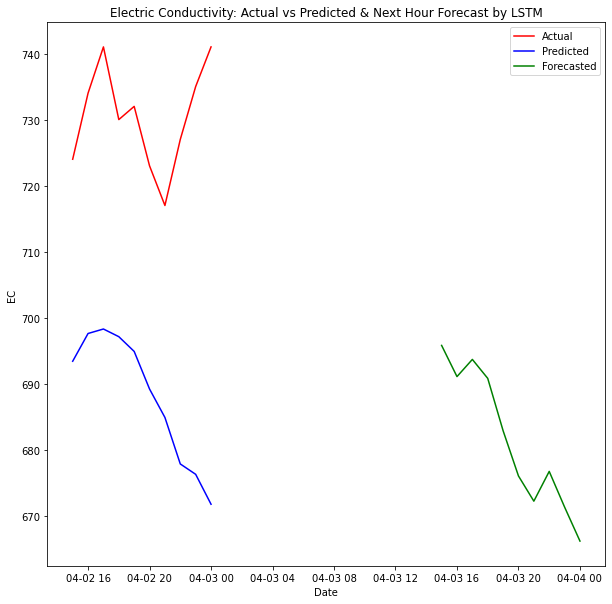

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(for_display['Real_EC_Dates'],for_display['Mean Conductivity per Hour'],label='Actual',color='red')
plt.plot(for_display['Real_EC_Dates'],for_display['final_ec_pred'],label='Predicted',color='blue')
plt.plot(for_display['Real_EC_Dates'],for_display['EC Forecasted'],label='Forecasted',color='green')
plt.title("Electric Conductivity: Actual vs Predicted & Next Hour Forecast by LSTM")
plt.xlabel("Date")
plt.ylabel("EC")
plt.legend()
plt.show()